## Extra Modeling NB

### This extra models notebook tries to test my model 'modelJ.h5' on other data. The top portion tries to forecast given data during another timeframe within the 10 year period while the bottom half tries to forecast data from the Salton Sea (near LA, Mexico, San Diego area). I chose this area because there was recent seismic activity from the news that said a string of quakes here may lead to a looming larger earthquake.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
pd.set_option('display.max_rows', 300)
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
from numpy import loadtxt
from keras.models import load_model

In [3]:
#loading csv
df1=pd.read_csv('query(5).csv')

In [4]:
import pickle

In [5]:
#importing results dataframe
results=pickle.load( open( "save.results", "rb" ) )

In [6]:
results=results.groupby('time3').mean()

In [140]:
#tested model with a different subset of observations
final_results=results[:4200]

In [141]:
#scale data before passing thru NN
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_results[['mag']])
data= final_results.filter(['mag'])
dataset=data.values

In [142]:
#getting len of training data 
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

3360

In [143]:
#Obtaining the entire set of training data to be splitter
train_data= scaled_data[0:training_data_len , :]

In [144]:
# split data in x, y train
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [145]:
#turning data into np.array
x_train=np.array(x_train) 
y_train=np.array(y_train)

In [146]:
# Reshape the data
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3300, 60, 1)

In [147]:
# load a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model7 = load_model('modelJ.h5copy')

In [148]:
test_data= scaled_data[training_data_len-60: , :]
#Create teh data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len: ,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [149]:
#Convert data into np.array
x_test = np.array(x_test)

In [150]:
#Reshape the data for keras
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] , 1))

In [151]:
#predicted magnitudes to see if there is a looming notable earthquake
predictions=model7.predict(x_test)
predictions= scaler.inverse_transform(predictions)

In [152]:
#Get the RMSE
#Get the SMAPE
RMSE= np.sqrt( np.mean(predictions- y_test)**2)
RMSE

0.16963379426371483

In [153]:
# SMAPE score
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
print(f"SMAPE: {smape(y_test[0], predictions[0])}")

SMAPE: 35.38645691502469


In [154]:
#converting our testset into something seaborn can graph
A=[list(y) for y in y_test]

In [155]:
A= list(A)

In [156]:
C=[]
for x in A:
    for y in x:
        C.append(y)

In [157]:
len(C)

840

Text(0, 0.5, 'Magnitude')

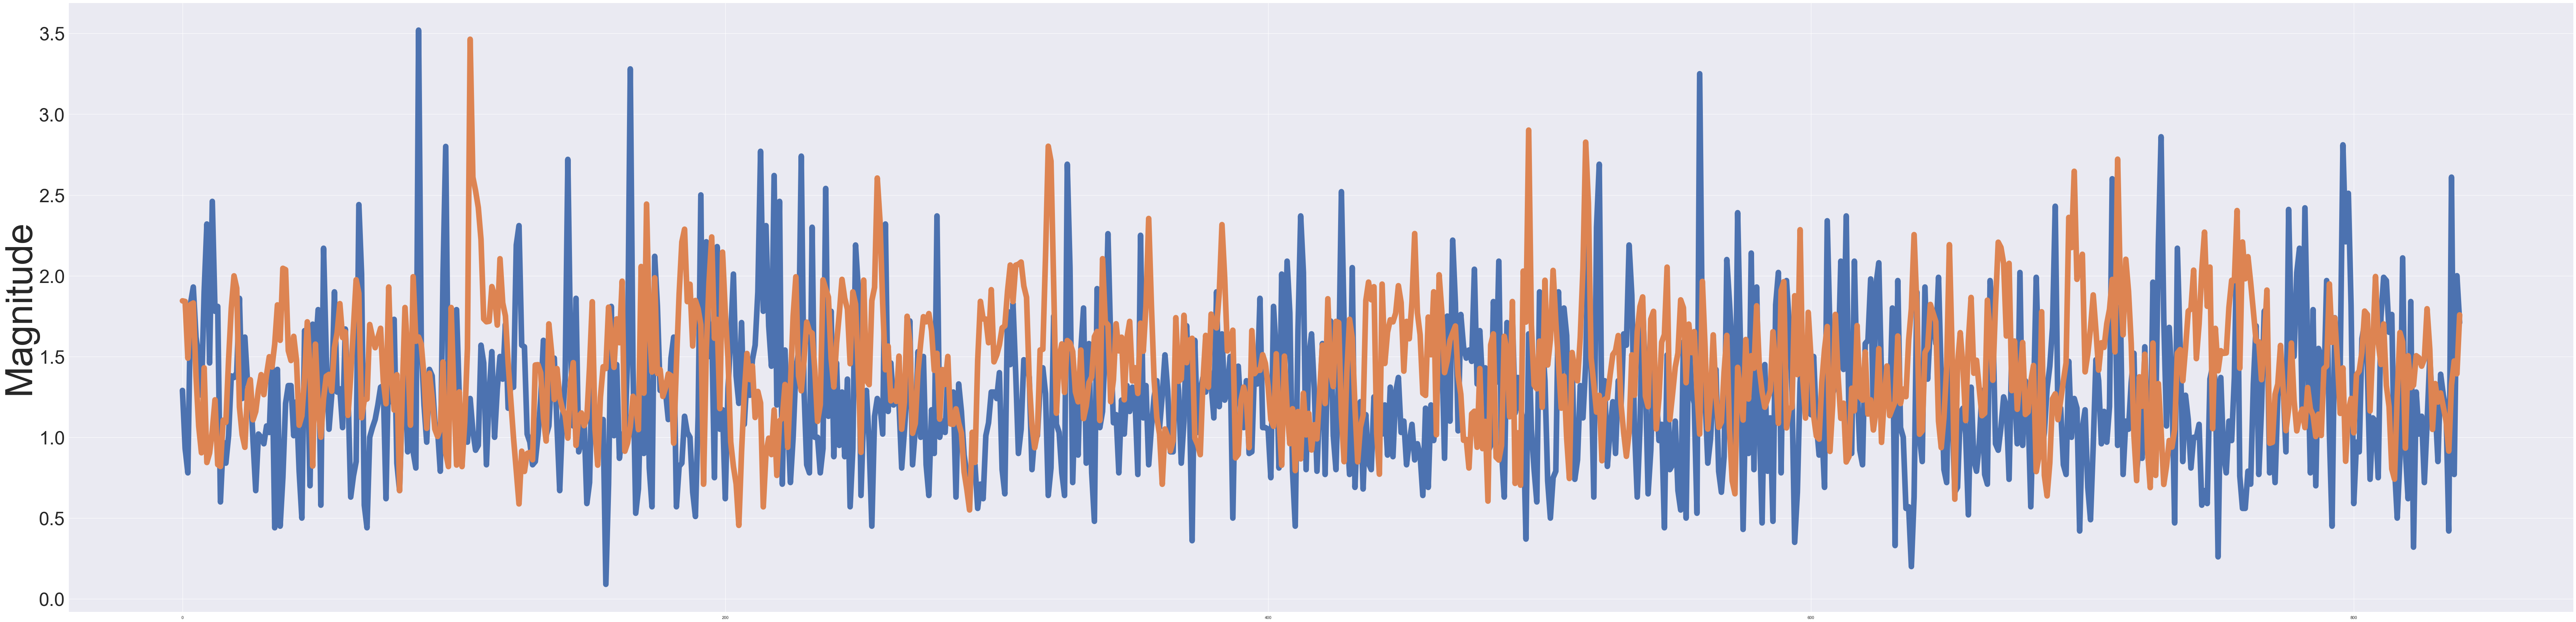

In [161]:
plt.figure(figsize=(120,30))
sns.set(style='darkgrid')
sns.lineplot(x=range(0,840) , y=C, linewidth= 15)
sns.lineplot(x=range(0,840), y=D, linewidth=15)
plt.yticks(fontsize=50)
plt.ylabel('Magnitude', fontsize=100)

In [158]:
A= [list(y) for y in predictions]

In [159]:
D=[]
for x in A:
    for y in x:
        D.append(y)

In [160]:
len(D)

840

## Now I look into busy seismic data in the Salton Sea and try to forecast

In [118]:
df2=pd.read_csv('querySALTON.csv')

### Data Cleaning 

In [120]:
#coordinates of our data in question
df2['latitude'].max(), df2['latitude'].min(), df2.longitude.max(), df2.longitude.min()

(33.429333299999996, 32.854, -115.53083329999998, -116.3925)

In [121]:
#converting my time series from string to datetime
df2['time2']=[ele.replace('T', ' ') for ele in df2['time']]

In [122]:
def datetime(data):
    a=[]
    for i in range(377):
        a.append(df2.time2[i][0:19])
    return a

In [123]:
a=datetime(df2['time2'])

In [124]:
#passing the variable into my dataframe in a new column
df2['time3']=a

In [125]:
#examination to see cleaned data
df2['time3'].head(1)

0    2020-08-03 00:07:23
Name: time3, dtype: object

### Prepping data for running LSTM 'modelJ.h5copy'

In [126]:
#scale data before passing thru NN
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df2[['mag']])
data= df2.filter(['mag'])
dataset=data.values

In [127]:
#getting len of training data 
training_data_len = math.ceil(len(dataset)*1)
training_data_len

377

In [128]:
#Obtaining the entire set of training data to be splitter
train_data= scaled_data[0:training_data_len , :]

In [129]:
# split data in x, y train
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [130]:
#turning data into np.array
x_train=np.array(x_train) 
y_train=np.array(y_train)

In [131]:
# Reshape the data
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(317, 60, 1)

In [162]:
model7

In [163]:
predictions_LA=model7.predict(x_train)
predictions_LA= scaler.inverse_transform(predictions_LA)

In [164]:
#Get the RMSE
#Get the SMAPE
RMSE= np.sqrt( np.mean(predictions_LA- y_train)**2)
RMSE

1.4682683092913773

In [165]:
print(f"SMAPE: {smape(y_train, predictions_LA)}")

SMAPE: 152.43047056512566


### Looking at my SMAPE I realized that my model can only forecast to data from that specific region. (SF/Area).  The reason for that is because LSTM finds patterns within that data specific to the region and cant be used to generalize anywhere else.